# Introduction to Zarr and OME-Zarr

Zarr is a format for the storage of chunked, compressed, N-dimensional arrays.
Arrays can be organised into hierarchical groups with associated metadata. We are working on [OME-zarr](https://ngff.openmicroscopy.org/), a specification for how to represent Images, HCS Plates, ROIs and other data in Zarr format


# Zarr

## Arrays

Zarr arrays are stored as a directory that contains binary 'chunks' of data and a JSON file `.zarray` that specifies the chunks metadata. For example: 

```
# .zarray
{
    "chunks": [
        1,
        1,
        1,
        256,
        336
    ],
    "compressor": {
        "blocksize": 0,
        "clevel": 5,
        "cname": "lz4",
        "id": "blosc",
        "shuffle": 1
    },
    "dtype": "<i8",
    "fill_value": 0,
    "filters": null,
    "order": "C",
    "shape": [
        1,
        1,
        1,
        1024,
        1344
    ],
    "zarr_format": 2
}
```
Chunks are named according to their index in the N-dimensional array. For example, in the 5D array above, chunks would be named:

```
# chunks of 5D array
0.0.0.0.0
0.0.0.0.1
0.0.0.0.2
0.0.0.0.3
0.0.0.1.0
0.0.0.1.1
...
```

## Groups

Zarr groups are directories that contain arrays or other groups, and a JSON file `.zattrs` that contains data about the group and it's contents.


# OME zarr

## Images

In OME zarr, Images are represented by a group with `multiscales` metadata. It may also contain `omero` metadata if available. The `multiscales` section will list 1 or more multiscale `datasets`, with a `path` to each zarr 5D `array` at different resolutions. Array dimensions are Time, Channel, Z, Y, X (`t.c.z.y.x`).

```
# image.zarr/.zattrs
{
    "multiscales": [
        {
            "datasets": [
                {
                    "path": "0"             # Path to Array containing full-size Image
                },
                {
                    "path": "1"             # Path to Array containing sub-resolution Image
                },
                {
                    "path": "2"             # Path to Array containing sub-resolution Image
                }
            ],
            "version": "0.1"
        }
    ],
    "omero": {
        "channels": [
            {
                "active": true,
                "coefficient": 1.0,
                "color": "0000FF",
                "family": "linear",
                "inverted": false,
                "label": "DAPI",
                "window": {
                    "end": 1500.0,
                    "max": 65535.0,
                    "min": 0.0,
                    "start": 0.0
                }
            }
        ],
        "id": 1,
        "rdefs": {
            "defaultT": 0,
            "defaultZ": 0,
            "model": "color"
        }
    }
}
```

Each Image array is found under the specified `path`, e.g. for `"path": "0"`:

```
# image.zarr/0/
.zarray
0.0.0.0.0
0.0.0.0.1
0.0.0.1.0
0.0.0.1.1
...
```

## Loading sample OME zarr Images

A list of example Images (from the IDR), converted to `OME zarr` and hosted at https://s3.embassy.ebi.ac.uk is available at https://blog.openmicroscopy.org/file-formats/community/2020/11/04/zarr-data/. You can 'copy' links to Images from the table.


In [1]:
import dask.array as da
import numpy as np
from IPython.display import display, Image
from matplotlib import pyplot as plt
import requests
import zarr

In [2]:
imagepath = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/9822152.zarr"

In [3]:
# Load the top-level .zattrs Image metadata
zattrs = requests.get(f'{imagepath}/.zattrs').json()
# Get the path for each resolution of the first multiscale dataset  
resolutions = [d['path'] for d in zattrs['multiscales'][0]['datasets']]

darrays = []
for resolution in resolutions:
    print(f'Resolution: "{resolution}"')
    # Create a 'dask' array (like numpy array but with lazy loading of data)
    array_5d = da.from_zarr(f'{imagepath}/{resolution}')
    darrays.append(array_5d)
    display(array_5d)

Resolution: "0"


,Array,Chunk
Bytes,26.91 GB,2.10 MB
Shape,"(1, 1, 1, 93184, 144384)","(1, 1, 1, 1024, 1024)"
Count,12832 Tasks,12831 Chunks
Type,>u2,numpy.ndarray


Resolution: "1"


,Array,Chunk
Bytes,6.73 GB,2.10 MB
Shape,"(1, 1, 1, 46592, 72192)","(1, 1, 1, 1024, 1024)"
Count,3267 Tasks,3266 Chunks
Type,>u2,numpy.ndarray


Resolution: "2"


,Array,Chunk
Bytes,1.68 GB,2.10 MB
Shape,"(1, 1, 1, 23296, 36096)","(1, 1, 1, 1024, 1024)"
Count,829 Tasks,828 Chunks
Type,>u2,numpy.ndarray


Resolution: "3"


,Array,Chunk
Bytes,420.45 MB,2.10 MB
Shape,"(1, 1, 1, 11648, 18048)","(1, 1, 1, 1024, 1024)"
Count,217 Tasks,216 Chunks
Type,>u2,numpy.ndarray


Resolution: "4"


dask.array<from-zarr, shape=(1, 1, 1, 5824, 9024), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "5"


dask.array<from-zarr, shape=(1, 1, 1, 2912, 4512), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "6"


dask.array<from-zarr, shape=(1, 1, 1, 1456, 2256), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "7"


dask.array<from-zarr, shape=(1, 1, 1, 728, 1128), dtype=>u2, chunksize=(1, 1, 1, 728, 1024), chunktype=numpy.ndarray>

Resolution: "8"


dask.array<from-zarr, shape=(1, 1, 1, 364, 564), dtype=>u2, chunksize=(1, 1, 1, 364, 564), chunktype=numpy.ndarray>

Resolution: "9"


dask.array<from-zarr, shape=(1, 1, 1, 182, 282), dtype=>u2, chunksize=(1, 1, 1, 182, 282), chunktype=numpy.ndarray>

Resolution: "10"


dask.array<from-zarr, shape=(1, 1, 1, 91, 141), dtype=>u2, chunksize=(1, 1, 1, 91, 141), chunktype=numpy.ndarray>

Display the smallest resolution image. In this image `T`, `C`, `Z` are all singleton dimensions

(91, 141)


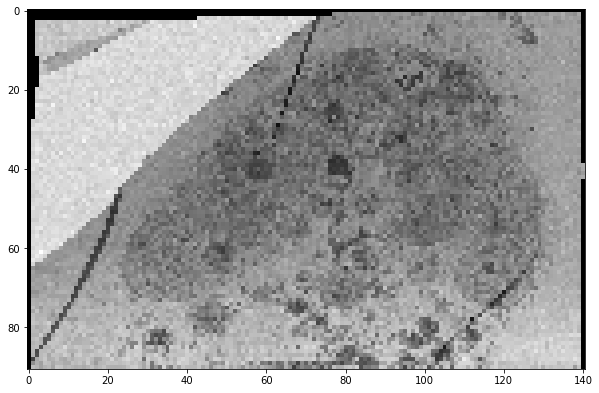

In [4]:
array_5d = darrays[-1]
array_2d = array_5d[0, 0, 0, :, :]
print(array_2d.shape)
plt.figure(figsize=(10, 10))
plt.imshow(array_2d, cmap='gray')

As you can see it very low resolution, so let's look at the 3rd smallest resolution instead.

(364, 564)


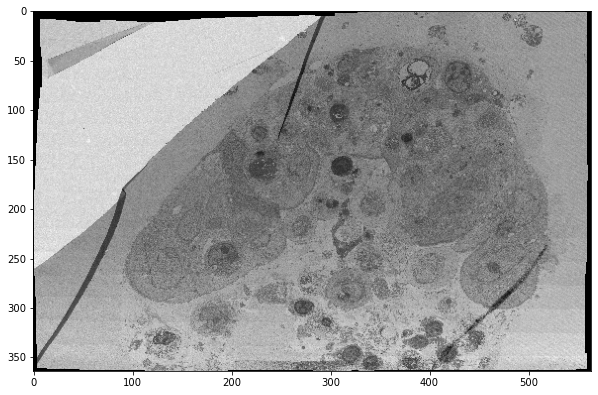

In [5]:
array_5d = darrays[-3]
array_2d = array_5d[0, 0, 0, :, :]
print(array_2d.shape)
plt.figure(figsize=(10, 10))
plt.imshow(array_2d, cmap='gray')

Now "zoom in" to the centre of image by showing the same number of pixels but at the next resolution up

resolution: 10, cy: 45, cx: 70


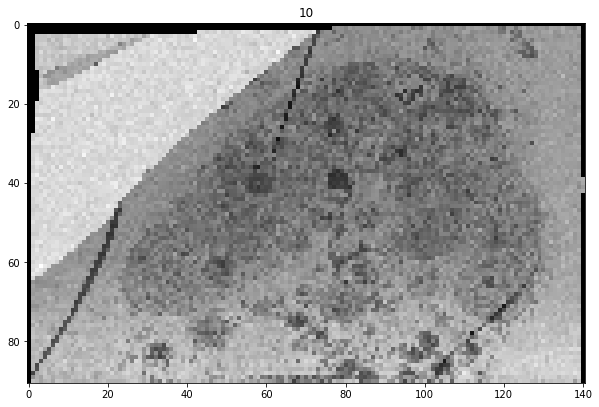

resolution: 9, cy: 91, cx: 141


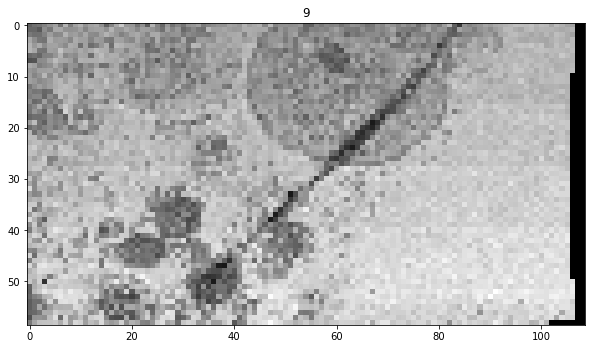

resolution: 8, cy: 182, cx: 282


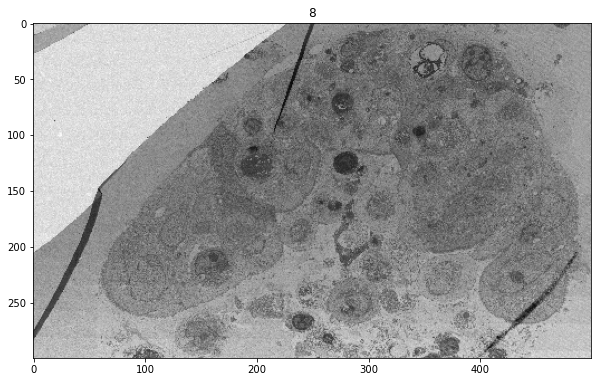

resolution: 7, cy: 364, cx: 564


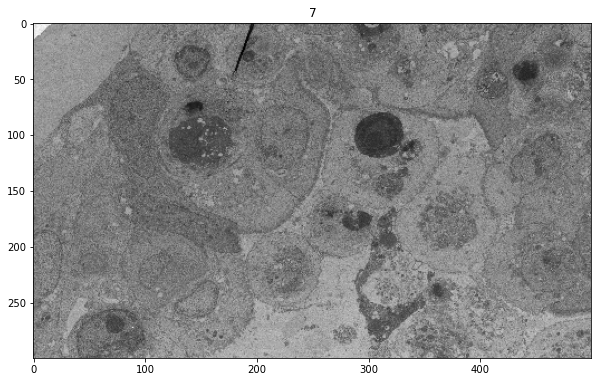

resolution: 6, cy: 728, cx: 1128


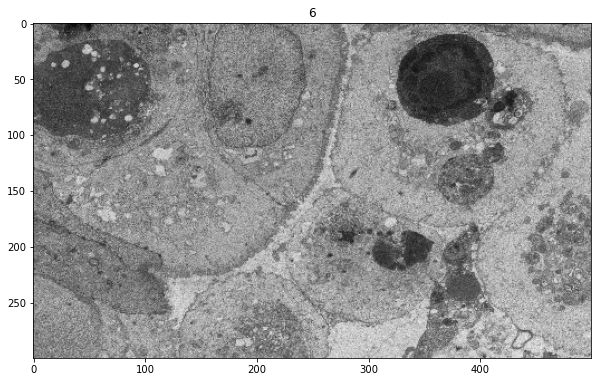

resolution: 5, cy: 1456, cx: 2256


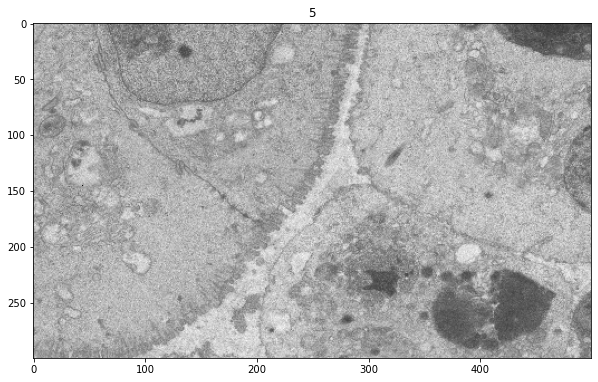

resolution: 4, cy: 2912, cx: 4512


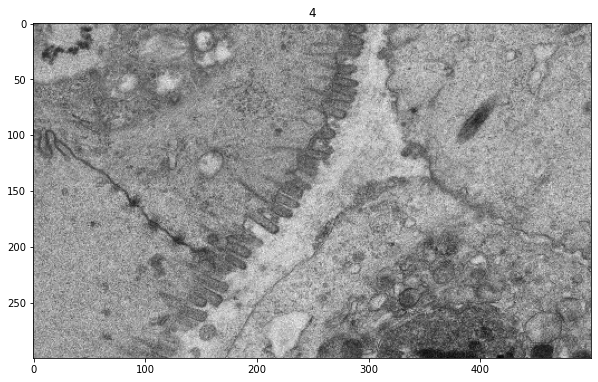

resolution: 3, cy: 5824, cx: 9024


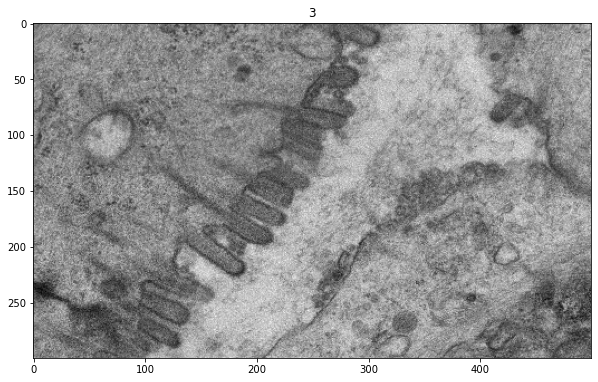

resolution: 2, cy: 11648, cx: 18048


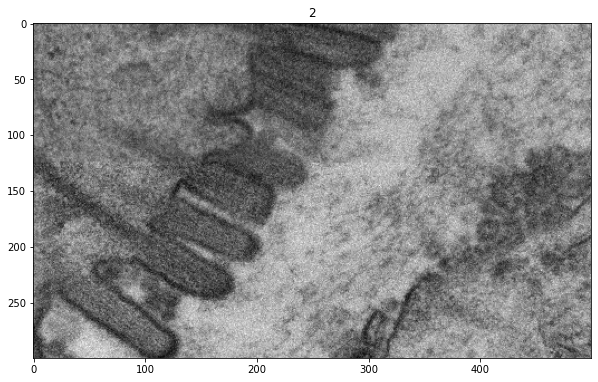

resolution: 1, cy: 23296, cx: 36096


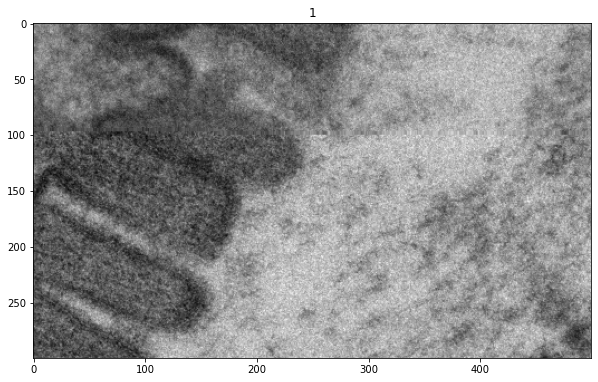

resolution: 0, cy: 46592, cx: 72192


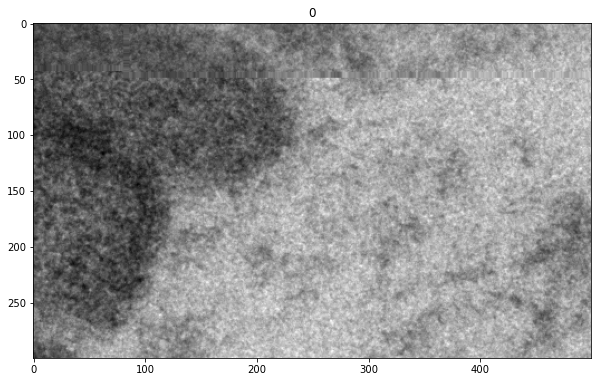

In [6]:
# size of the region we want to show
rwidth = 500
rheight = 300

# load a region for each level, from smallest to largest 
levels = range(len(darrays))
for level in reversed(levels):
    array_5d = darrays[level]
    array_2d = array_5d[0, 0, 0, :, :]
    # We want to show the centre-point of each level
    cy, cx = int(array_2d.shape[0] / 2), int(array_2d.shape[1] / 2)
    print(f'resolution: {level}, cy: {cy}, cx: {cx}')
    # Crop the dask array - still doesn't load remote data yet
    y1 = cy - (rheight/2)
    y2 = cy + (rheight/2)
    x1 = cx - (rwidth/2)
    x2 = cx + (rwidth/2)
    region = array_2d[y1:y2, x1:x2]
    plt.figure(figsize=(10, 10))
    # Show the image - loading remote data
    plt.imshow(region, cmap='gray')
    plt.title(level)
    plt.show()

## Labels

Labels (or Masks) are pixel-based Regions of Interest, such as image segmentations. In OME zarr, labels are stored in a `labels` directory within the image.zarr directory. Labels are 5D zarr arrays corresponding to the shape of the parent image, with background values of `0` and each label represented by a different pixel value.

Multiple `arrays` of labels can be stored under the labels group, as defined in the `labels/.zattrs` JSON:

```
# image.zarr/labels/.zattrs

{
    "labels": [
        "0"
    ]
}
```

This indicates a labels array at `image.zarr/labels/0/`.




In [7]:
imagepath = 'https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/2551.zarr/A/1/0'
zattrs = requests.get(f'{imagepath}/labels/.zattrs').json()
print('zattrs', zattrs)

label_path = zattrs['labels'][0]
labels_metadata = requests.get(f'{imagepath}/labels/{label_path}/.zattrs').json()
print('labels multiscales', labels_metadata['multiscales'])

zattrs {'labels': ['0']}
labels multiscales [{'datasets': [{'path': '0'}, {'path': '1'}, {'path': '2'}, {'path': '3'}, {'path': '4'}, {'path': '5'}], 'version': '0.1'}]


min_value: 632780, max_value: 632815


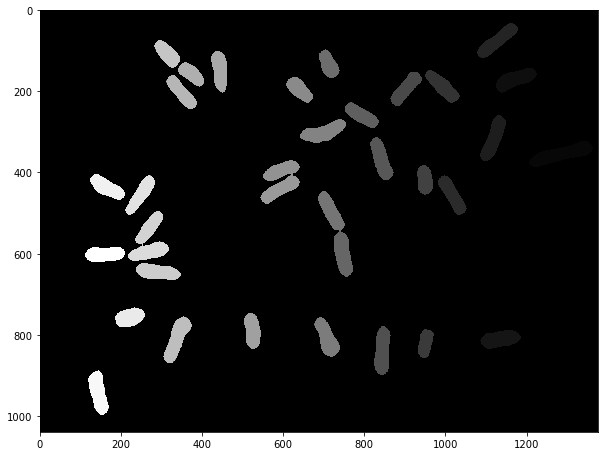

In [8]:
# As for 'image' we have a pyramid of 'multiscales' arrays
res = [d['path'] for d in labels_metadata['multiscales'][0]['datasets']]
labels_5d = da.from_zarr(f'{imagepath}/labels/{label_path}/{res[0]}')
labels_2d = labels_5d[0, 0, 0, :, :]

# load the dask array, so we can find max and min
labels_2d = labels_2d.compute()
max_value = labels_2d.max()
min_value = labels_2d[labels_2d > 0].min()   # min() ignoring 0 values
print(f'min_value: {min_value}, max_value: {max_value}')

# Render, scaling gray from min to max
plt.figure(figsize=(10, 10))
plt.imshow(labels_2d, cmap='gray', vmin=min_value, vmax=max_value)
plt.show()

Labels metadata

Metadata for labels can be stored within an `image-label` object in each labels `.zattrs`. The labels are identified by the `label-value`, which is the pixel value of the corresponding label. Currently the defined keys are `colors` and `properties`, which may be used for storing custom properties for each label:

```
# image.zarr/labels/0/.zattrs

{
  "multiscales": [
    # as for images above
  ],
  "image-label":
    {
      "version": "0.1",
      "colors": [
        {
          "label-value": 732780,
          "rgba": [255, 255, 255, 0]
        },
        {
          "label-value": 732781,
          "rgba": [0, 255, 255, 128]
        },
        ...
        ]
      },
      "properties": [
        {
          "label-value": 732780,
          "text": "nucleus 1",
          "GFP intensity": 456.5
        },
        {
          "label-value": 732781,
          "text": "nucleas 2",
          "GFP intensity": 678.0
        },
        ...
        ]
      },
      "source": {
        "image": "../../"
      }
    }
}

```

## Plates - HCS Data

A Plate is a collection of Images with 1 or more Images (fields) in a Well into rows and columns. In OME-Zarr, this is represented as a hierarchy of groups: `plate/row_name/column_name/field_index/`.

The `.zattrs` at the top level will contain `plate` metadata to specify the row and column names and the wells in the plate (not every row/column position may contain a well):

```
# plate/.attrs

{
  "plate": {
    "name": "plate-name",
    "rows": [
        {
            "name": "A"
        },
        {
            "name": "B"
        }
    ],
    "columns": [
        {
            "name": "1"
        },
        {
            "name": "2"
        },
        {
            "name": "3"
        }
    ],
    "field_count": 4,
    "version": "0.1",
    "wells": [
        {
            "path": "A/1"
        },
        {
            "path": "A/2"
        },
        {
            "path": "B/1"
        },
        {
            "path": "B/3"
        }
    ]
  }
}

```



Sample HCS plates in OME-Zarr format are listed at https://blog.openmicroscopy.org/file-formats/community/2020/12/01/zarr-hcs/   

In [9]:
plate_url = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr"
# Alternative plate
# plate_url = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/2551.zarr"

# Load the top-level .zattrs Plate metadata
zattrs = requests.get(f'{plate_url}/.zattrs').json()
plate_metadata = zattrs['plate']
# Get the path to each well - NB: May not be sorted yet
well_paths = [w['path'] for w in plate_metadata['wells']]
well_paths.sort()
print(well_paths)

['A/1', 'A/10', 'A/11', 'A/12', 'A/2', 'A/3', 'A/4', 'A/5', 'A/6', 'A/7', 'A/8', 'A/9', 'B/1', 'B/10', 'B/11', 'B/12', 'B/2', 'B/3', 'B/4', 'B/5', 'B/6', 'B/7', 'B/8', 'B/9', 'C/1', 'C/10', 'C/11', 'C/12', 'C/2', 'C/3', 'C/4', 'C/5', 'C/6', 'C/7', 'C/8', 'C/9', 'D/1', 'D/10', 'D/11', 'D/12', 'D/2', 'D/3', 'D/4', 'D/5', 'D/6', 'D/7', 'D/8', 'D/9', 'E/1', 'E/10', 'E/11', 'E/12', 'E/2', 'E/3', 'E/4', 'E/5', 'E/6', 'E/7', 'E/8', 'E/9', 'F/1', 'F/10', 'F/11', 'F/12', 'F/2', 'F/3', 'F/4', 'F/5', 'F/6', 'F/7', 'F/8', 'F/9', 'G/1', 'G/10', 'G/11', 'G/12', 'G/2', 'G/3', 'G/4', 'G/5', 'G/6', 'G/7', 'G/8', 'G/9', 'H/1', 'H/10', 'H/11', 'H/12', 'H/2', 'H/3', 'H/4', 'H/5', 'H/6', 'H/7', 'H/8', 'H/9']


https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/1/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/10/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/11/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/12/0/4
data_5d.shape (329, 2, 1, 64, 84)
https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/plates/422.zarr/A/2/0/4
data_5d.shape (329, 2, 1, 64, 84)


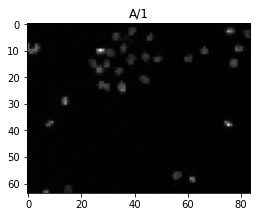

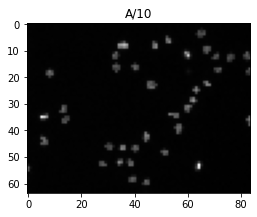

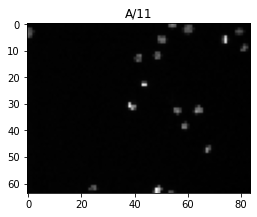

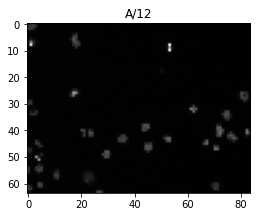

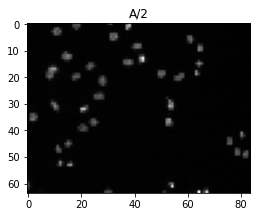

In [10]:
# We can assume at least 1 field (image) in each well
field = '0'
# Load metadata for first Well
image_metadata = requests.get(f'{plate_url}/{well_paths[0]}/{field}/.zattrs').json()
resolutions = [d['path'] for d in image_metadata['multiscales'][0]['datasets']]

# Show the lowest resolution, first ZCT plane of first 5 Wells
Z, C, T = (0, 0, 0)
resolution = resolutions[-1]
for path in well_paths[0:5]:
    print(f'{plate_url}/{path}/{field}/{resolution}')
    data_5d = da.from_zarr(f'{plate_url}/{path}/{field}/{resolution}')
    print('data_5d.shape', data_5d.shape)
    first_plane = data_5d[T, C, Z, :, :]
    plt.figure(figsize=(4, 4))
    plt.title(path)
    plt.imshow(first_plane, cmap='gray')

### License
Copyright (C) 2020 University of Dundee. All Rights Reserved.
This program is free software; you can redistribute it and/or modify it
under the terms of the GNU General Public License as published by the
Free Software Foundation; either version 2 of the License, or
(at your option) any later version.
This program is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY
or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for
more details. You should have received a copy of the GNU General
Public License along with this program; if not, write to the
Free Software Foundation,
Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA.